# Intro to Plotting with MatPlotLib

Plotting data is an essential skill to have when embarking on a Data Science project. It allows us to visually represent our data to make important decisions about how we will perform analysis, as well as giving us the ability to clearly communicate any findings.

While there are a number of Python libraries to perform plotting (and we will use many of them), MatPlotLib is one of the oldest and most commonly seen - so let's dive in.

In [1]:
# We'll use numpy to generate data for demonstration purposes
# And matplotlib's  pyplot module to create graphs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Line Graphs

In [2]:
# Let's generate an array's of point values
x = np.linspace(-3.1459, 3.1459, 20)

# And two more arrays with the sin and cosine of each point
y = np.sin(x)
z = np.cos(x)

print(x)
print(y)
print(z)

[-3.1459     -2.81475263 -2.48360526 -2.15245789 -1.82131053 -1.49016316
 -1.15901579 -0.82786842 -0.49672105 -0.16557368  0.16557368  0.49672105
  0.82786842  1.15901579  1.49016316  1.82131053  2.15245789  2.48360526
  2.81475263  3.1459    ]
[ 0.00430733 -0.32105194 -0.61152567 -0.83555092 -0.96878508 -0.99675091
 -0.91640963 -0.73649114 -0.47654542 -0.1648182   0.1648182   0.47654542
  0.73649114  0.91640963  0.99675091  0.96878508  0.83555092  0.61152567
  0.32105194 -0.00430733]
[-0.99999072 -0.94706159 -0.7912246  -0.54941302 -0.24790214  0.08054582
  0.40024166  0.67644718  0.87914985  0.98632396  0.98632396  0.87914985
  0.67644718  0.40024166  0.08054582 -0.24790214 -0.54941302 -0.7912246
 -0.94706159 -0.99999072]


sin(x)


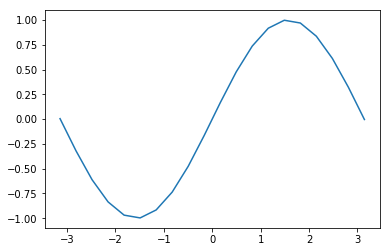

cos(x)


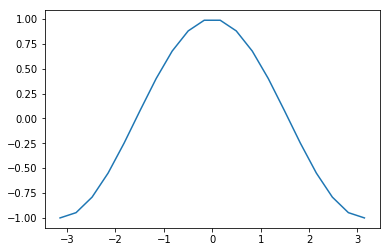

In [3]:
# Plotting lines is easy, just pass your x-axis values, followed by your y-axis values to the plot method
print("sin(x)")
plt.plot(x, y)
plt.show()

print("cos(x)")
plt.plot(x, z)
plt.show()

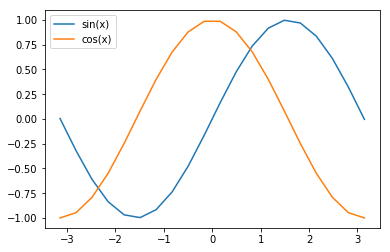

In [4]:
# Or, on a single plot, using labels
plt.plot(x, y, label="sin(x)")
plt.plot(x, z, label="cos(x)")

plt.legend(loc="upper left")

plt.show()

### Scatter Plots

In [8]:
# Let's generate 100 random x values and 100 random y values
x = np.random.random(100)
y = np.random.random(100)

np.random.random()

print(x[:10])
print(y[:10])

[0.23982051 0.55719577 0.71367743 0.82276946 0.50390828 0.99378202
 0.40384573 0.94078451 0.87909666 0.39562212]
[0.16178822 0.24381784 0.81950132 0.64567368 0.41610773 0.66420045
 0.79429372 0.62544333 0.78255439 0.33775717]


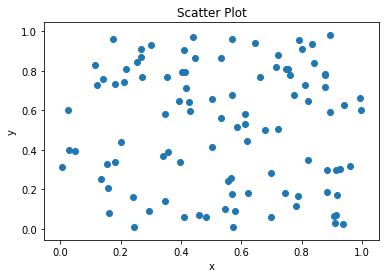

In [9]:
# Just like before, but this time use the scatter method
plt.scatter(x, y)

# Lets add labels too
plt.xlabel("x")
plt.ylabel("y")

# And a title
plt.title("Scatter Plot")

plt.show()

### Basic Linear Regression Example

In [10]:
# We have a text file that shows the brain weight v. body weight for a number of mammals
data_fp = 'data/brain2body.txt'

# Use the np.loadtxt method to unpack the columns into arrays
x, y = np.loadtxt(data_fp, delimiter=',', unpack=True)
print(x[:10])
print(y[:10])

[3.385e+00 4.800e-01 1.350e+00 4.650e+02 3.633e+01 2.766e+01 1.483e+01
 1.040e+00 4.190e+00 4.250e-01]
[ 44.5  15.5   8.1 423.  119.5 115.   98.2   5.5  58.    6.4]


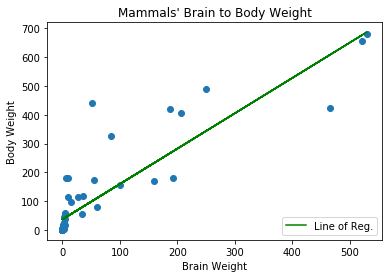

In [11]:
# Let's use polyfit to calculate a "best-fit" line of regression
slope, intercept = np.polyfit(x, y, 1)
reg_line = [slope*x_point + intercept for x_point in x]

# Scatter our weight values and add some labels
plt.scatter(x, y)
plt.xlabel('Brain Weight')
plt.ylabel('Body Weight')

# Add our regression line
plt.plot(x, reg_line, 'g', label='Line of Reg.')

plt.title('Mammals\' Brain to Body Weight')
plt.legend(loc='lower right')
plt.show()

### Time Series

In [16]:
# We have a CSV file showing median listing prices for homes in Richmond County
# Let's import a couple new modules to help with time series data
from matplotlib.mlab import csv2rec
from matplotlib.ticker import Formatter

# csv2rec is awesome!
records = csv2rec('data/richmond_median_list_prices.csv')
records[:3]

rec.array([(datetime.date(2013, 1, 31), 74950., 89900., 147200., 229700. ),
           (datetime.date(2013, 2, 28), 74900., 90000., 144500., 228851. ),
           (datetime.date(2013, 3, 31), 78250., 92000., 148000., 234592.5)],
          dtype=[('date', 'O'), ('value2b', '<f8'), ('value3b', '<f8'), ('value4b', '<f8'), ('value5b', '<f8')])

In [13]:
# Since we're dealing with timestamps, we need to specify a formatter object which
# will inform plt how to diplay the ticks on our chart.
class OurFormatter(Formatter):
    
    def __init__(self, dates, fmt='%Y-%m-%d'):
        self.dates = dates
        self.fmt = fmt
        
    def __call__(self, x, pos=0):
        ind = int(np.round(x))
        if ind >= len(self.dates) or ind < 0:
            return ''
        return self.dates[ind].strftime(self.fmt)

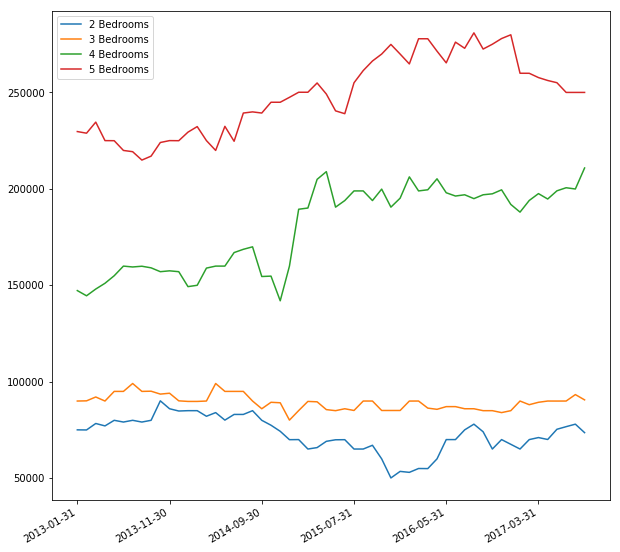

In [21]:
# Let's create an instance of OurFormatter
formatter = OurFormatter(records.date)

# And instead of using plt directly, let's use the subplots method to return a Figure object and an AxesSubplot object
# using the figsize argument to make sure out graph is larger
fig, ax = plt.subplots(figsize=(10, 10))

# We'll set the x-axis of ax to use the formatter
ax.xaxis.set_major_formatter(formatter)

# And start plotting our data
ax.plot(np.arange(len(records)), records.value2b, label='2 Bedrooms')
ax.plot(np.arange(len(records)), records.value3b, label='3 Bedrooms')
ax.plot(np.arange(len(records)), records.value4b, label='4 Bedrooms')
ax.plot(np.arange(len(records)), records.value5b, label='5 Bedrooms')

# Add a legend
ax.legend()

# Now, let's call the autofmt_xdate() method on our figure, and show the plot
fig.autofmt_xdate()

plt.show()